# Timing DFT/IDFT functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `DFT_dumb` and `DFT_recursive`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of elements forming the vectors
N = np.array([2**i for i in range(4,11)])

In [3]:
N

array([  16,   32,   64,  128,  256,  512, 1024])

In [4]:
list_time_dumb = []
list_time_recursive = []
list_time_scipy = []
for Ni in tq(N):
    data = np.ones(Ni)
    # DFT_dumb
    time = %timeit -o fcs.DFT_dumb(x=data, scale=None)
    list_time_dumb.append(time.average)
    # DFT_recursive
    time = %timeit -o fcs.DFT_recursive(x=data, scale=None)
    list_time_recursive.append(time.average)
    # scipy.fft.fft
    time = %timeit -o sp.fft.fft(x=data, norm=None)
    list_time_scipy.append(time.average)

116 µs ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
92.4 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12.5 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
203 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
210 µs ± 5.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.7 µs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
569 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
570 µs ± 3.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.8 µs ± 32.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.82 ms ± 4.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.17 ms ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.3 µs ± 31.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.95 ms ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.39 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs

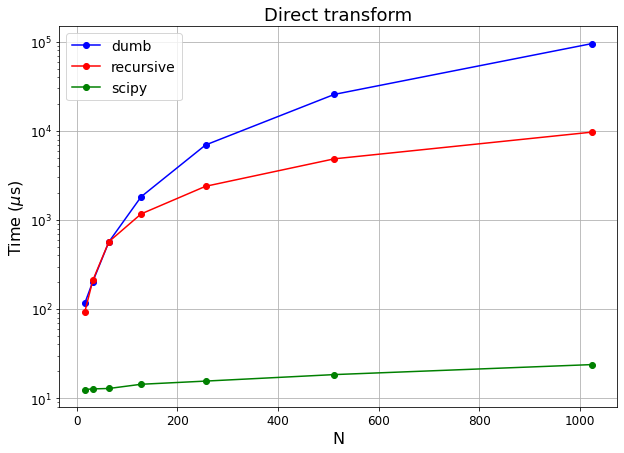

In [5]:
plt.figure(figsize=(10,7))
plt.title('Direct transform', fontsize=18)
plt.plot(N, np.asarray(list_time_dumb)*1e6, 'bo-', label = 'dumb')
plt.plot(N, np.asarray(list_time_recursive)*1e6, 'ro-', label = 'recursive')
plt.plot(N, np.asarray(list_time_scipy)*1e6, 'go-', label = 'scipy')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()

In [6]:
list_time_dumb = []
list_time_recursive = []
list_time_scipy = []
for Ni in tq(N):
    data = np.ones(Ni)
    # IDFT_dumb
    time = %timeit -o fcs.IDFT_dumb(X=data, scale='n')
    list_time_dumb.append(time.average)
    # IDFT_recursive
    time = %timeit -o fcs.IDFT_recursive(X=data, scale='n')
    list_time_recursive.append(time.average)
    # scipy.fft.ifft
    time = %timeit -o sp.fft.ifft(x=data, norm=None)
    list_time_scipy.append(time.average)

96 µs ± 842 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
96.7 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12.4 µs ± 59.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
212 µs ± 941 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
208 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.6 µs ± 53.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
616 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
582 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.9 µs ± 91 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.06 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.28 ms ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.9 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.88 ms ± 92.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.44 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs,

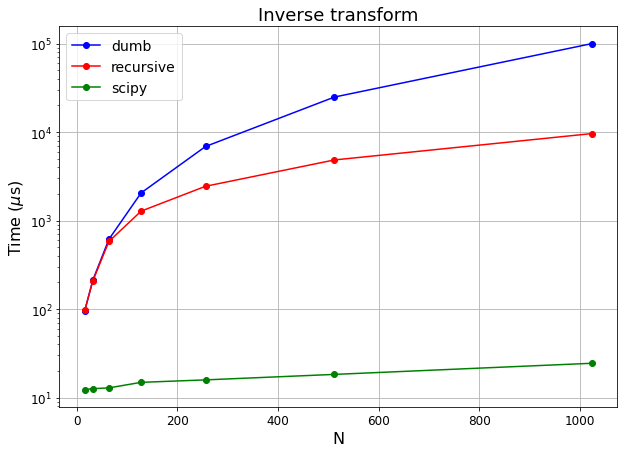

In [7]:
plt.figure(figsize=(10,7))
plt.title('Inverse transform', fontsize=18)
plt.plot(N, np.asarray(list_time_dumb)*1e6, 'bo-', label = 'dumb')
plt.plot(N, np.asarray(list_time_recursive)*1e6, 'ro-', label = 'recursive')
plt.plot(N, np.asarray(list_time_scipy)*1e6, 'go-', label = 'scipy')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()

In [10]:
data = np.random.rand(1024*16)

In [11]:
%timeit -o fcs.DFT_recursive(x=data, scale=None)

159 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 159 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [12]:
%timeit -o sp.fft.fft(x=data, norm=None)

240 µs ± 6.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 240 µs ± 6.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>

In [14]:
%timeit -o fcs.IDFT_recursive(X=data+1j*data, scale=None)

166 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 166 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [15]:
%timeit -o sp.fft.ifft(x=data+1j*data, norm=None)

452 µs ± 3.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 452 µs ± 3.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>